<br>
<br>

# Implementacion de un perceptron

In [1]:
import numpy as np


class Perceptron(object):
    """Clasificador perceptron.
    """
    def __init__(self, eta=0.01, n_iter=50, estado_aleat =1):
        self.eta = eta
        self.n_iter = n_iter
        self.estado_aleat = estado_aleat

    def fit(self, X, y):
        """Entrenar al sistema.
        """
        rgen = np.random.RandomState(self.estado_aleat)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errores_ = []

        for _ in range(self.n_iter):
            errores = 0
            for xi, dep  in zip(X, y):
                actualizar = self.eta * (dep - self.prediccion(xi))
                self.w_[1:] += actualizar * xi
                self.w_[0] += actualizar
                errores += int(actualizar != 0.0)
            self.errores_.append(errores)
        return self

    def entrada_neta(self, X):
        """Senal neta de entrada"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def prediccion(self, X):
        """Devuelve una categoria"""
        return np.where(self.entrada_neta(X) >= 0.0, 1, -1)

# Entrenar al sistema con el dataset Iris

## Leer el dataset

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Visualizar el dataset

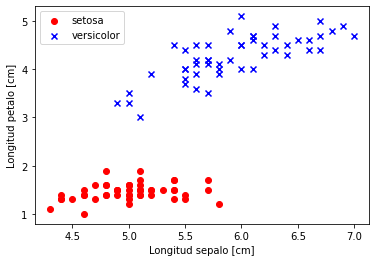

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# seleccionamos dos categorias:  setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extraemos el longitud de sepalo y petalo 

X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('Longitud sepalo [cm]')
plt.ylabel('Longitud petalo [cm]')
plt.legend(loc='upper left')

plt.show()

# Entrenar al nuestro modelo

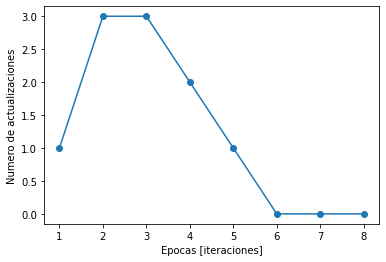

In [7]:
ppn = Perceptron(eta=0.1, n_iter=8)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errores_) + 1), ppn.errores_, marker='o')
plt.xlabel('Epocas [iteraciones]')
plt.ylabel('Numero de actualizaciones')

plt.show()

# Visualizar las regiones de decision

In [8]:
from matplotlib.colors import ListedColormap


def visualizar_regiones_decision(X, y, clasificador, resolucion=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Visualizar regiones
    # Umbrales
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Crear malla
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    
    # Predecir
    Z = clasificador.prediccion(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Visualizar
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

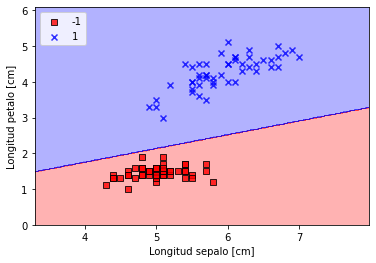

In [9]:
visualizar_regiones_decision(X, y, clasificador=ppn)
plt.xlabel('Longitud sepalo [cm]')
plt.ylabel('Longitud petalo [cm]')
plt.legend(loc='upper left')

plt.show()

# Fuente

## Libro

https://sebastianraschka.com/books/

## Codigo

https://github.com/rasbt/python-machine-learning-book-3rd-edition